In [1]:
#import
import sklearn
import numpy as np
import pandas as pd
from nn.nn import NeuralNetwork as nn
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt



In [2]:
#load data
dataset = sklearn.datasets.load_digits()

#extract features and labels
X = dataset.data
y = dataset.target

#normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
#shuffle data randomly
X_permuted = np.random.permutation(X) / 16.0

#split data (70% train, 30% validation)
X_train = X_permuted[:X.shape[0] * 7 // 10, :]
X_val = X_permuted[X.shape[0] * 7 // 10:, :]

In [ ]:
#generate instance of nn, use 64x16x64 autoencoder

#create desired architecture
nn_arch = [
    {"input_dim": 64, "output_dim": 16, "activation": "sigmoid"},  # encoder
    {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}  # decoder
]


#initialize nn
autoencoder = nn(
    nn_arch=nn_arch,
    lr=0.006,           # learning rate
    seed=42,            # random seed
    batch_size=32,      # batch size
    epochs=10,         # number of epochs
    loss_function= 'mean_squared_error' # loss function (Mean Squared Error for autoencoders)
)

In [16]:
#train autoencoder
loss_train, loss_val = autoencoder.fit(X_train, X_train, X_val, X_val)


shapes in forward pass, before calling single forward pass:
X shape: (32, 64) # (batch_size, feature_num)
current A_prev, right before single pass call 1
A_prev shape: (32, 64) # (batch_size, feature_num)
shapes in single forward pass, W_curr, A_prev, b_curr
W_curr shape: (16, 64) # (output_neuron, features/input neuron)
A_prev shape: (32, 64) # (batch_size, feature_num/input neuron)
b_curr shape: (16, 1) # (output_neuron, )
shapes in single forward pass, after Z_curr calc, before activation func, Z_curr
Z_curr shape: (32, 16) # (batch_size, output_neuron)
shapes in single forward pass, after Z_curr calc, and activation func, Z_curr, A_curr
Z_curr shape: (32, 16) # (batch_size, output_neuron)
A_curr shape: (32, 16) # (batch_size, output_neuron)
shapes in forward pass, after calling single forward pass, A, Z
A shape: (32, 16) # (batch_size, output_neuron)
Z shape: (32, 16) # (batch_size, output_neuron)
current A_prev, right before single pass call 2
A_prev shape: (32, 16) # (batch_size,

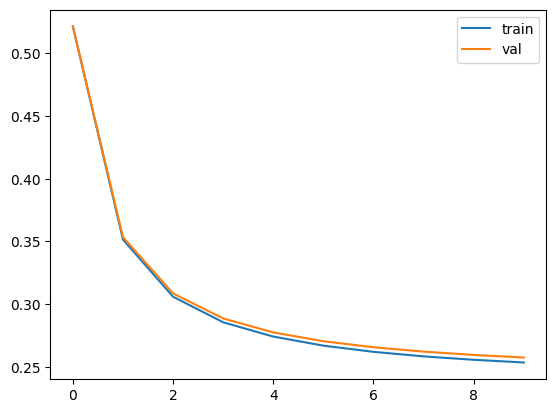

In [17]:
#plot training and validation loss over epochs
plt.plot(loss_train, label="train")
plt.plot(loss_val, label="val")
plt.legend()
plt.show()



In [7]:
#quantify average reconstruction error on validation set
avg_reconstruction_error = np.mean(loss_val)
print(f"The average reconstruction loss in the validation set at the end of training is {avg_reconstruction_error}.")

The average reconstruction loss in the validation set at the end of training is 0.3431512464589005.


shapes in forward pass, before calling single forward pass:
X shape: (5, 64) # (batch_size, feature_num)
current A_prev, right before single pass call 1
A_prev shape: (5, 64) # (batch_size, feature_num)
shapes in single forward pass, W_curr, A_prev, b_curr
W_curr shape: (16, 64) # (output_neuron, features/input neuron)
A_prev shape: (5, 64) # (batch_size, feature_num/input neuron)
b_curr shape: (16, 1) # (output_neuron, )
shapes in single forward pass, after Z_curr calc, before activation func, Z_curr
Z_curr shape: (5, 16) # (batch_size, output_neuron)
shapes in single forward pass, after Z_curr calc, and activation func, Z_curr, A_curr
Z_curr shape: (5, 16) # (batch_size, output_neuron)
A_curr shape: (5, 16) # (batch_size, output_neuron)
shapes in forward pass, after calling single forward pass, A, Z
A shape: (5, 16) # (batch_size, output_neuron)
Z shape: (5, 16) # (batch_size, output_neuron)
current A_prev, right before single pass call 2
A_prev shape: (5, 16) # (batch_size, feature_

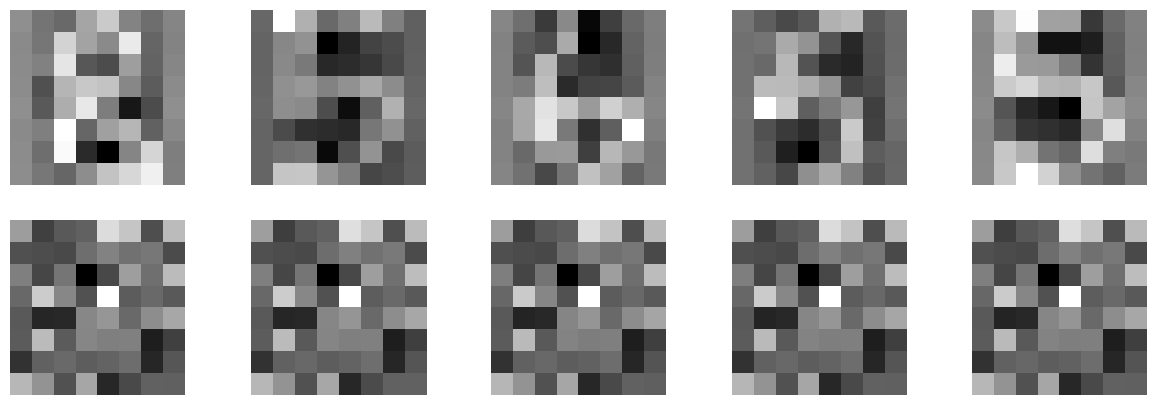

The average reconstruction loss in the samples is 0.0028770070061031176.


In [8]:
#visualize the reconstruction of some samples
n_samples = 5
samples = X_val[:n_samples]
reconstructed_samples = autoencoder.predict(samples)

#plot original and reconstructed samples
fig, axes = plt.subplots(2, n_samples, figsize=(15, 5))
for i in range(n_samples):
    axes[0, i].imshow(samples[i].reshape(8, 8), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(reconstructed_samples[i].reshape(8, 8), cmap="gray")
    axes[1, i].axis("off")
plt.show()

#quantify average reconstruction error of the samples
reconstruction_errors = np.mean(np.square(samples - reconstructed_samples), axis=1)
avg_reconstruction_error = np.mean(reconstruction_errors)
print(f"The average reconstruction loss in the samples is {avg_reconstruction_error}.")


I started with 100 epochs and a learning rate of 0.01, but it seemed to be overfitting. 
I experimented, and kept lowering the epoch number while also adjusting the learning rate until my loss looked reasonable. (epoch = 10, lr = .008)
I started with a batch size of 32, and compared it to 16. I did this after optimizing the other paramaters, and it didn't seem to make much of a difference, so I kept it at 32.

I had started with a relu activation function in the first layer, so I experimented with changing it to sigmoid as well. This definitely improved things, and my train/val losses more closely matched. 

I then lowered my learning rate to .06 and saw improved results. 

I stopped with these parameters to avoid hyperfitting.
